In [1]:
from dolfin import *
from mshr import *

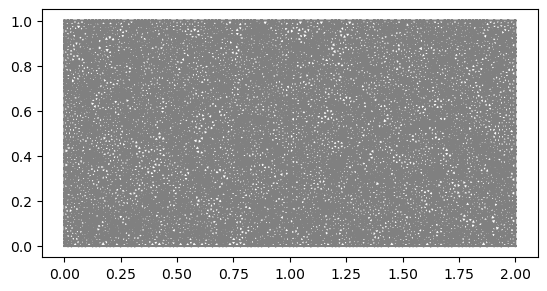

In [2]:
# Create mesh
rectangle = Rectangle(Point(0., 0.), Point(2., 1.))
subdomain = dict()
subdomain[1] = Rectangle(Point(0., 0.), Point(1., 1.))
subdomain[2] = Rectangle(Point(1., 0.), Point(2., 1.))
domain = rectangle
for i, s in subdomain.items():
    domain.set_subdomain(i, subdomain[i])
mesh = generate_mesh(domain, 64)
plot(mesh)

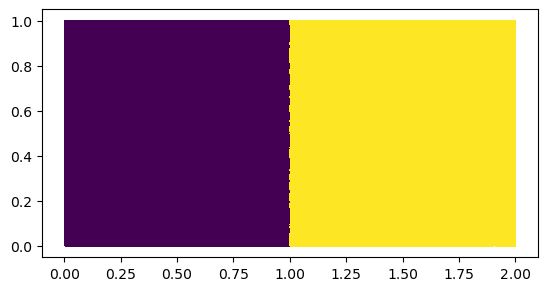

In [3]:
# Create subdomains
subdomains = MeshFunction("size_t", mesh, 2, mesh.domains())
plot(subdomains)

In [4]:
# Create boundaries
class Left(SubDomain):
    def __init__(self):
        SubDomain.__init__(self)

    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 0.) < DOLFIN_EPS


class Right(SubDomain):
    def __init__(self):
        SubDomain.__init__(self)

    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - 2.) < DOLFIN_EPS


class Bottom(SubDomain):
    def __init__(self, x_min, x_max):
        SubDomain.__init__(self)
        self.x_min = x_min
        self.x_max = x_max

    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 0.) < DOLFIN_EPS and x[0] >= self.x_min and x[0] <= self.x_max


class Top(SubDomain):
    def __init__(self, x_min, x_max):
        SubDomain.__init__(self)
        self.x_min = x_min
        self.x_max = x_max

    def inside(self, x, on_boundary):
        return on_boundary and abs(x[1] - 1.) < DOLFIN_EPS and x[0] >= self.x_min and x[0] <= self.x_max


boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
bottomLeft = Bottom(0., 1.)
bottomLeft.mark(boundaries, 1)
bottomRight = Bottom(1., 2.)
bottomRight.mark(boundaries, 2)
right = Right()
right.mark(boundaries, 3)
topRight = Top(1, 2.)
topRight.mark(boundaries, 4)
topLeft = Top(0., 1.)
topLeft.mark(boundaries, 5)
left = Left()
left.mark(boundaries, 6)

In [5]:
# Save
File("graetz_1.xml") << mesh
File("graetz_physical_region_1.xml") << subdomains
File("graetz_facet_region_1.xml") << boundaries
XDMFFile("graetz_1.xdmf").write(mesh)
XDMFFile("graetz_physical_region_1.xdmf").write(subdomains)
XDMFFile("graetz_facet_region_1.xdmf").write(boundaries)